In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Documentation https://matplotlib.org/stable/plot_types/index

In [8]:
# Data taken from https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?resource=download
df_train = pd.read_csv("DailyDelhiClimateTrain.csv", header=0)
df_test  = pd.read_csv("DailyDelhiClimateTest.csv", header=0)

In [9]:
df = pd.concat([df_train, df_test])
df["index"] = (list(range(0,len(df))))

In [10]:
df["meantemp_europe"] = df["meantemp"] - df["meantemp"]/df["humidity"]*0.8

In [11]:
df.set_index('index')

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_europe
index,,,,,,
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,9.905325
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.335652
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.100766
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,8.569470
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,5.944722
...,...,...,...,...,...,...
1571,2017-04-20,34.500000,27.500000,5.562500,998.625000,33.496364
1572,2017-04-21,34.250000,39.375000,6.962500,999.875000,33.554127
1573,2017-04-22,32.900000,40.900000,8.890000,1001.600000,32.256479


In [12]:
dict_df = {}
for index, element in enumerate(df.columns):
    dict_df[index] = element

In [19]:
def plot_temp(ticks = 30):
    plt.figure(figsize = (16,10), dpi = 240)

    x = np.arange(0,len(df["date"]), ticks)

    date_list = []
    date_index = []

    for y in x:
        date_list.append(df.iloc[y,0])
        date_index.append(y)

    plt.plot(df["index"], df["meantemp"], color = "black", linewidth = 3, label = "Mean Temp")
    plt.plot(df["index"], df["meantemp_europe"], color = "blue", linewidth = 3, label = "Europe Mean Temp")
    plt.bar(df["index"][-100:], df["meantemp"][-100:], color = "red", width = 0.2, label = "Last Month")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Temperature in Degrees Celsius")
    plt.title("Temperatures")
    plt.xticks(date_index, date_list, rotation = "vertical")
    figname = "Temp" + ".png"
    plt.grid(True)
    plt.savefig(figname)
    plt.show()

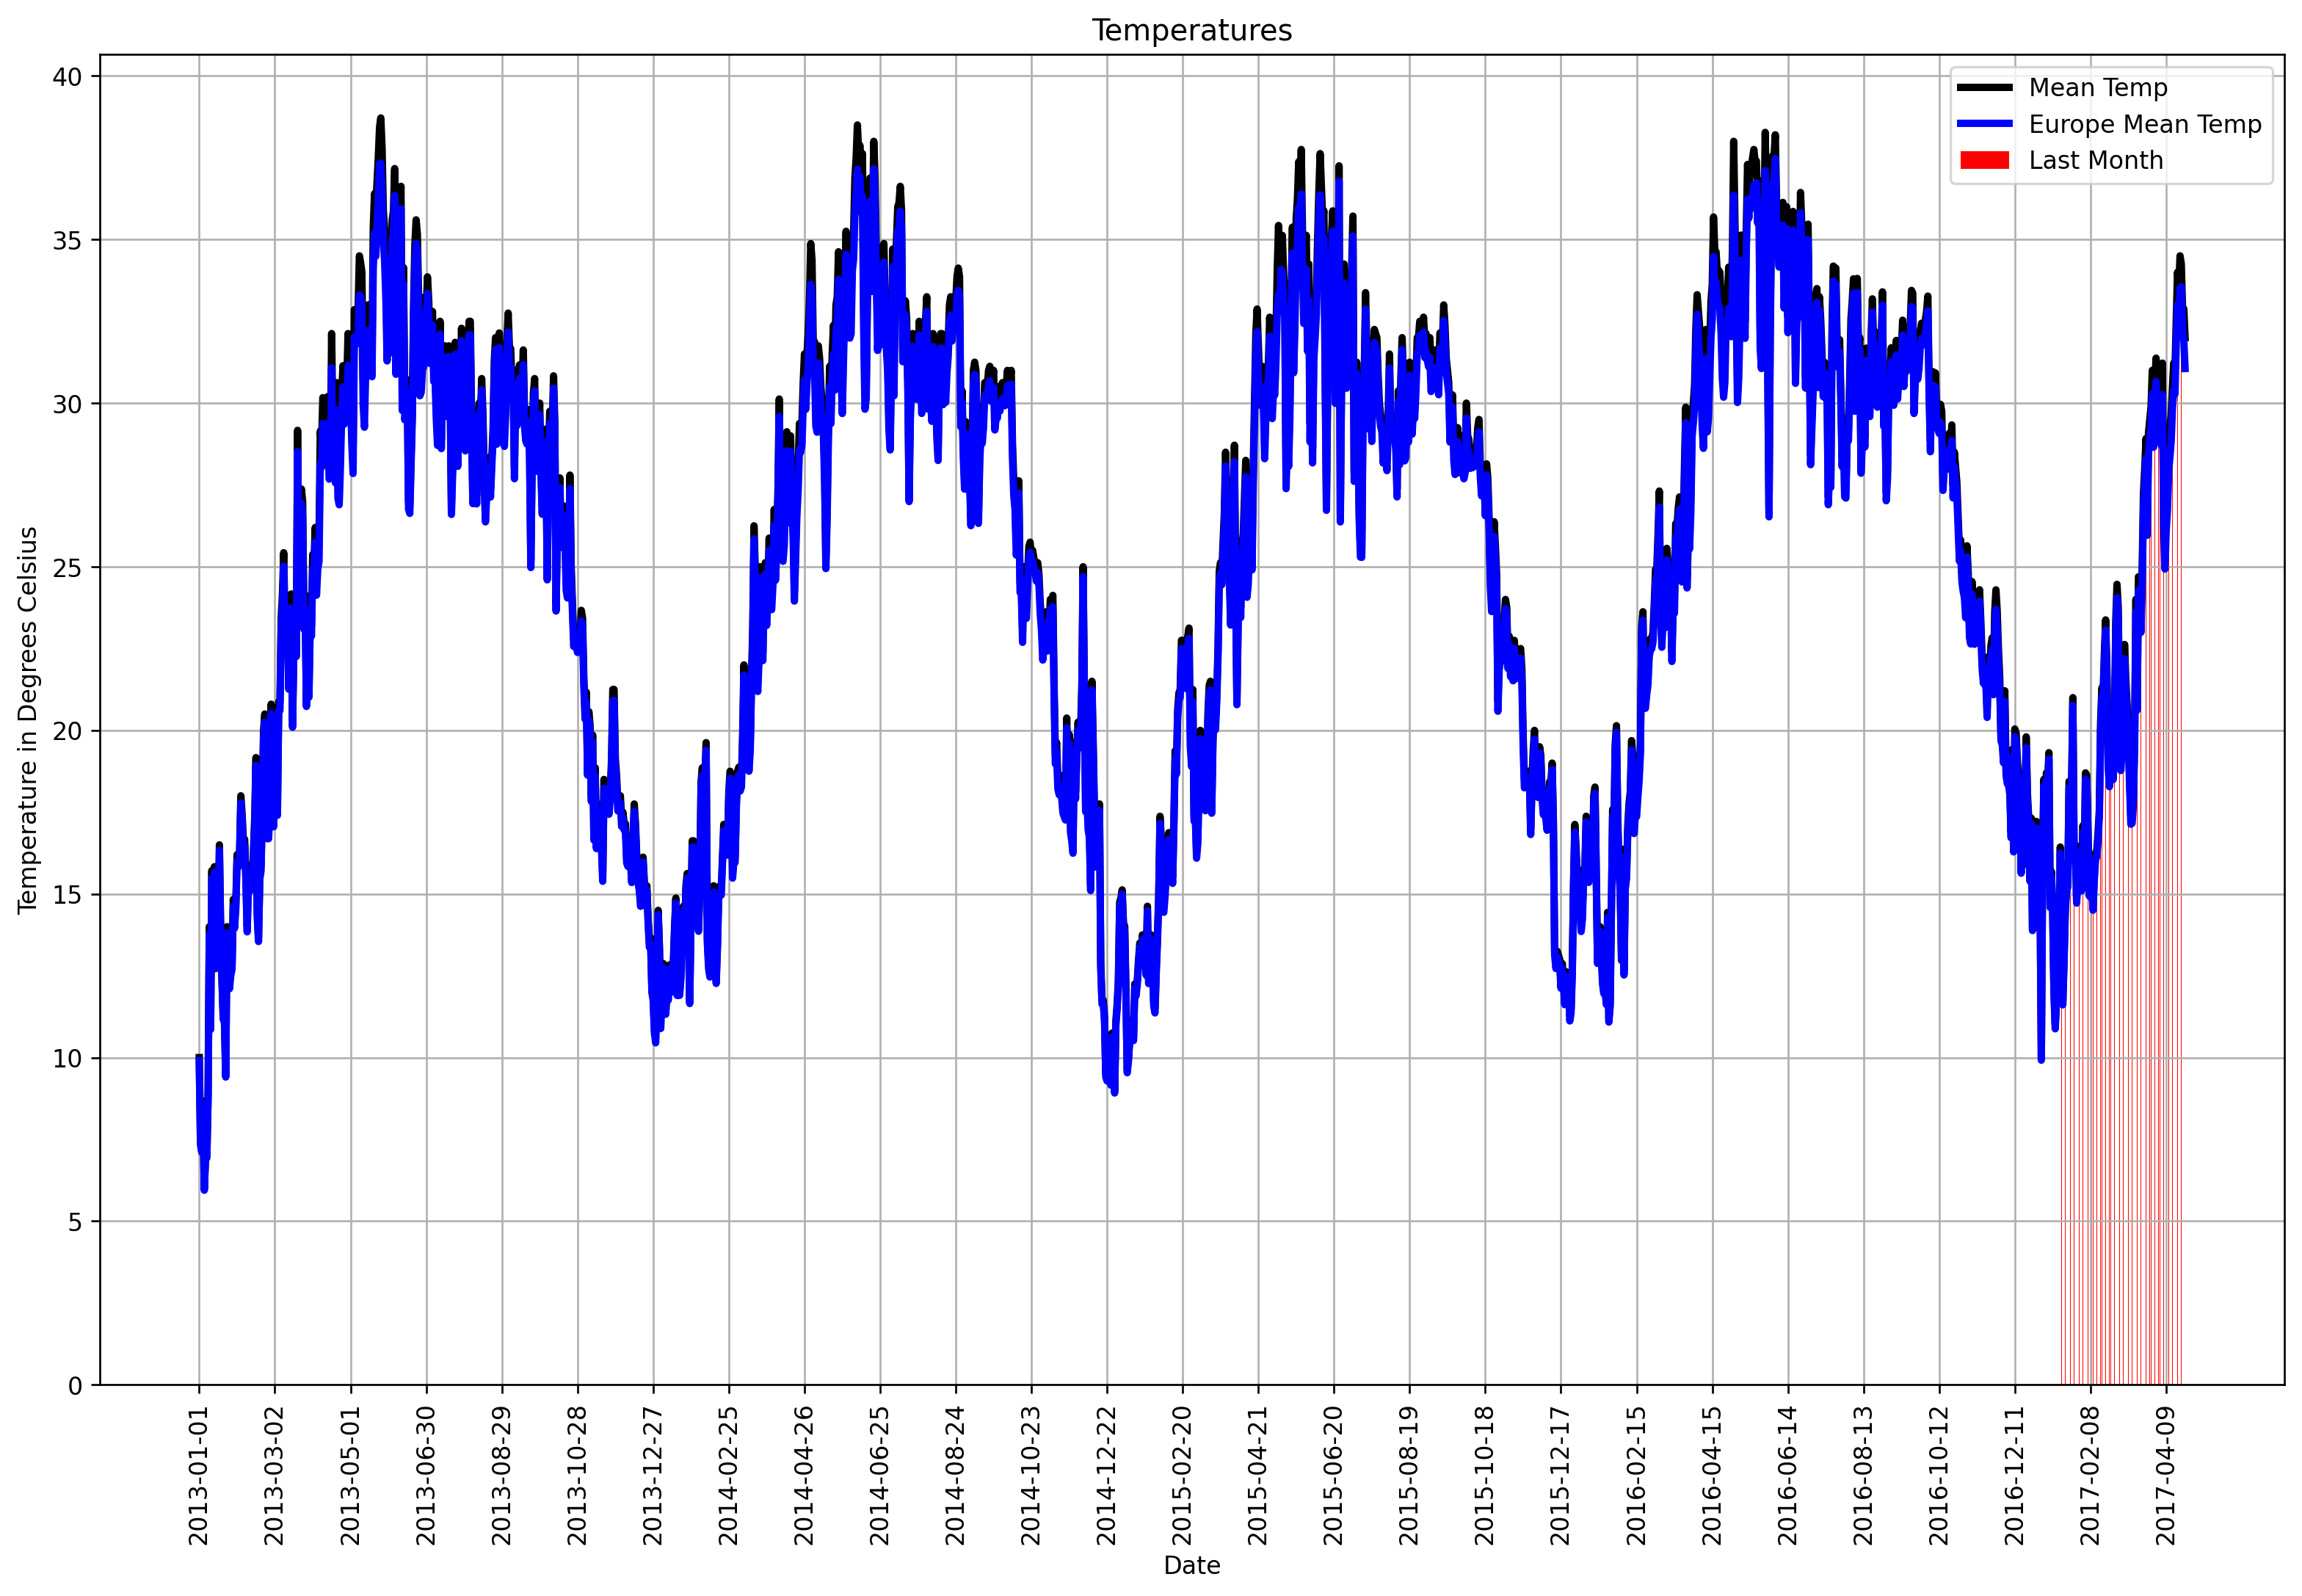

In [20]:
plot_temp(ticks = 60)

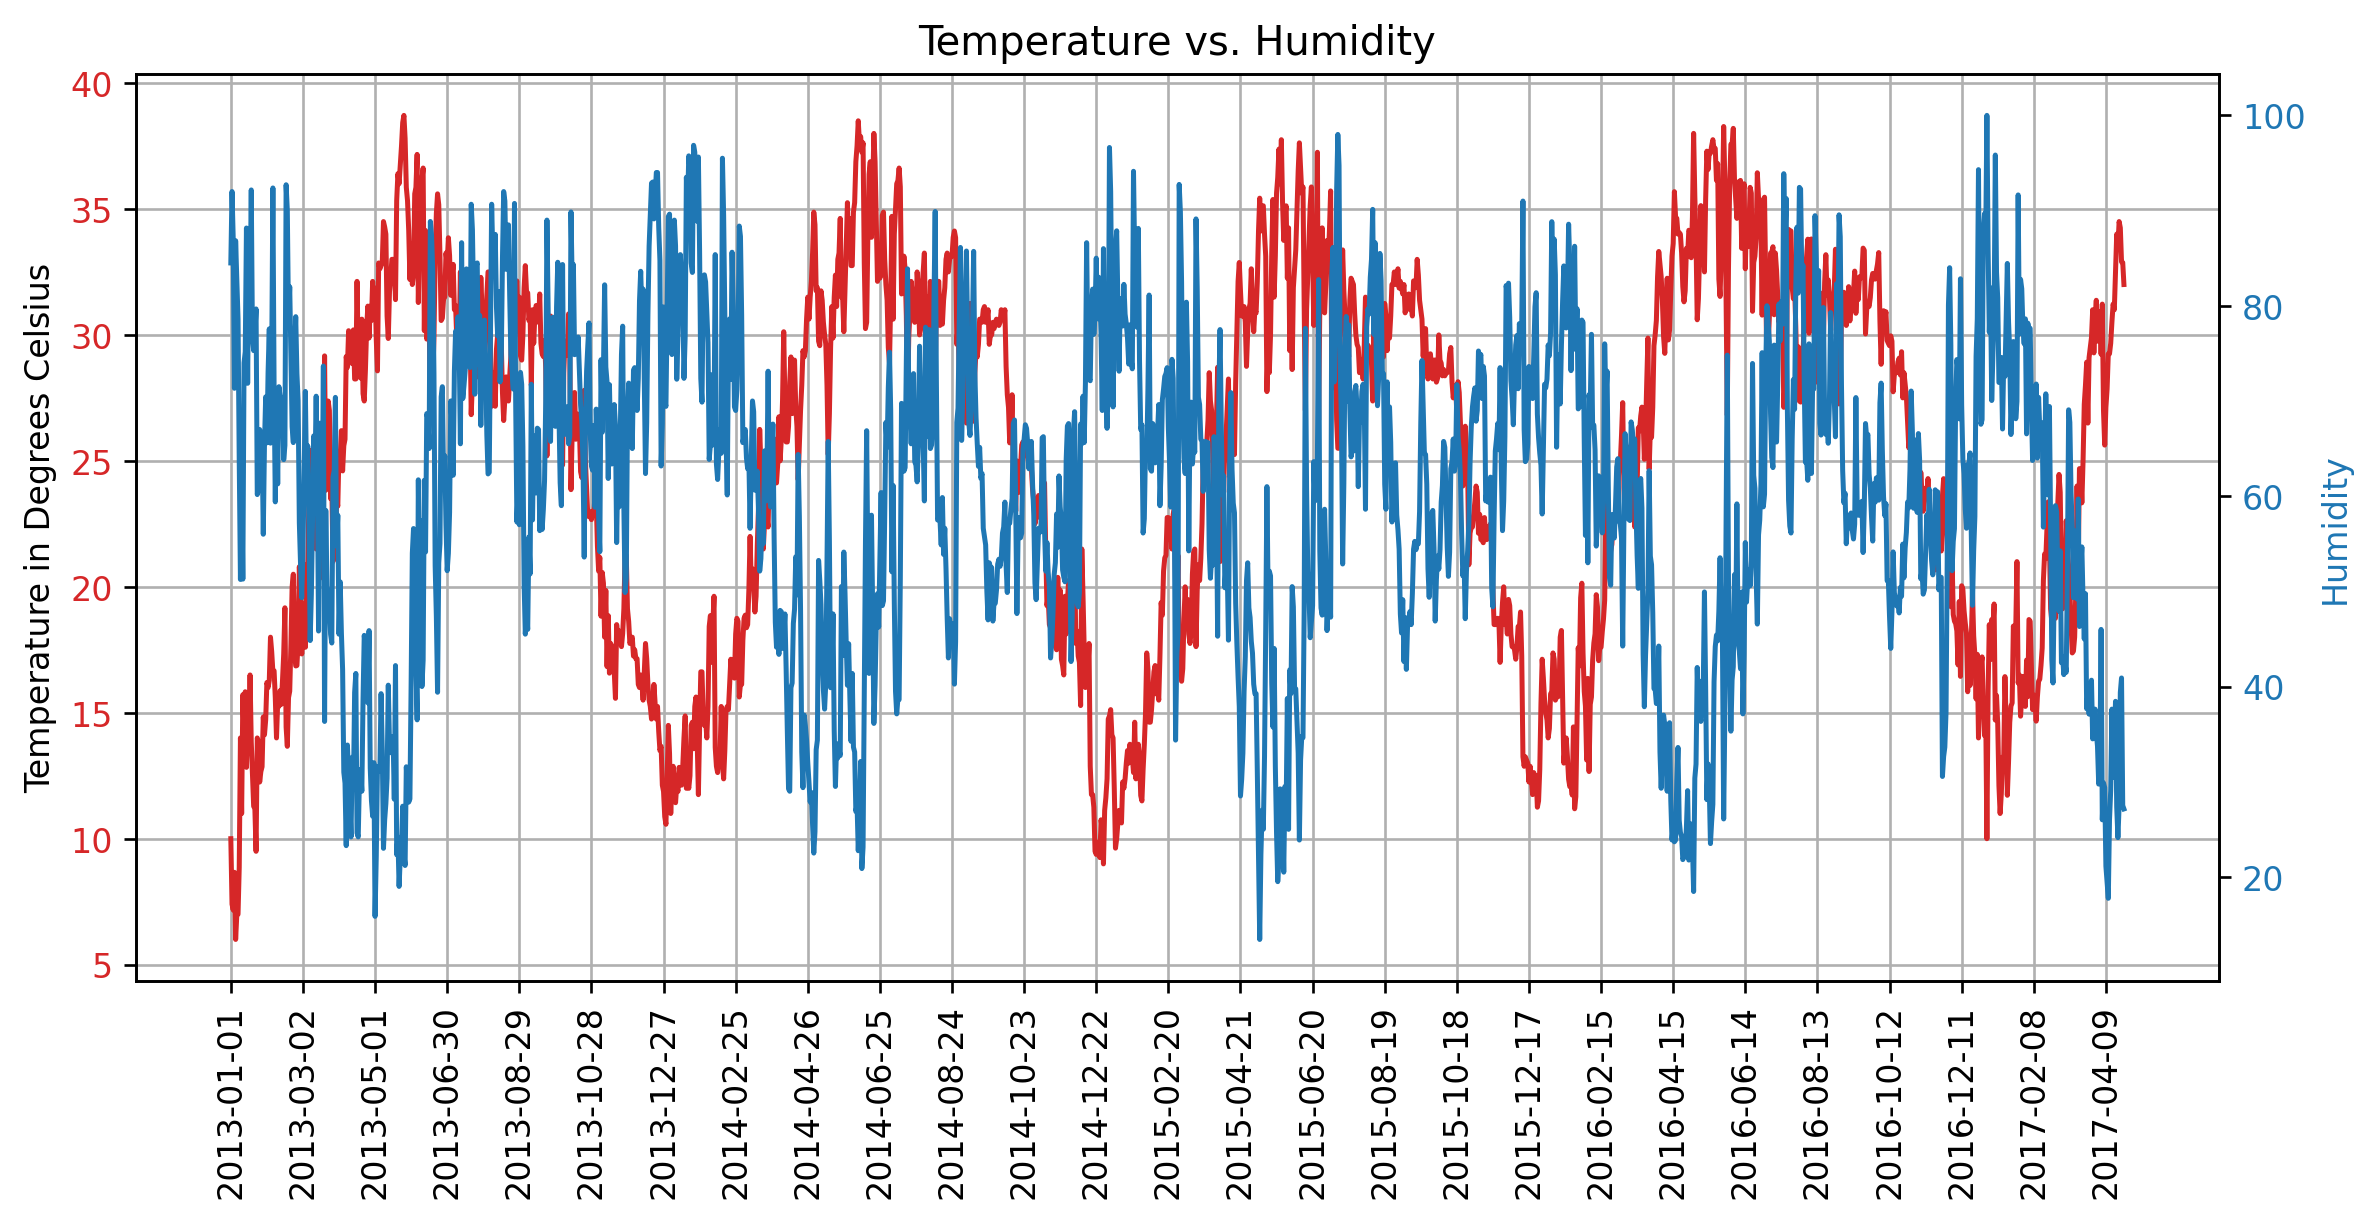

In [23]:
x = np.arange(0,len(df["date"]), 60)

date_list = []
date_index = []

for y in x:
    date_list.append(df.iloc[y,0])
    date_index.append(y)

fig = plt.figure(figsize = (10,5), dpi = 240)
ax1 = fig.add_subplot(111)

plt.xticks(date_index, date_list, rotation = "vertical")
color = "tab:red"
ax1.set_ylabel("Temperature in Degrees Celsius")
ax1.plot(df["index"], df["meantemp"], color = color)
ax1.tick_params(axis = "y", labelcolor = color)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Humidity", color = color)
ax2.plot(df["index"], df["humidity"], color = color)
ax2.tick_params(axis= "y", labelcolor = color)

fig.tight_layout()
ax1.grid(True)

ax2.set_title("Temperature vs. Humidity", y = 0.94)
plt.savefig("Temp_Humid.png")
plt.show()
